In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

%run pipeline.py
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.rm'] = 'Times New Roman'
plt.rcParams['mathtext.it'] = 'Times New Roman:italic'
plt.rcParams['mathtext.bf'] = 'Times New Roman:bold'
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'

In [3]:
path = '10arcmin_random'
sims = os.listdir('./%s'%path)

spec_q = []
spec_dla = []
for file in sims:
    if file.split('.')[0].split('_')[-1] == 'q':
        data = np.load('./%s/%s'%(path,file))
        spec_q.append(data)
    if file.split('.')[0].split('_')[-1] == 'dla':
        data = np.load('./%s/%s'%(path,file))
        spec_dla.append(data)
        
spec_q = np.concatenate(spec_q)
spec_dla = np.concatenate(spec_dla)


cov_q = np.cov(spec_q.T[0],bias=False)
cov_dla = np.cov(spec_dla.T[0],bias=False)

std_q = np.sqrt(np.diag(cov_q))
std_dla = np.sqrt(np.diag(cov_dla))


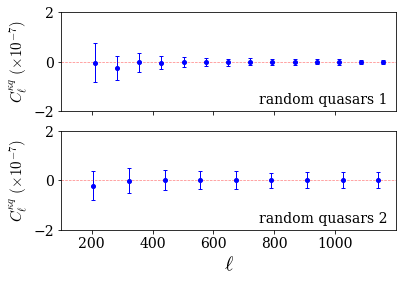

In [10]:
l_min=100
l_max=1200
band=15
width = int((l_max-l_min)/band)    
x = [np.mean([l_min+width*i,l_min+(i+1)*width]) for i in range(band)]

l_min=30
l_max=1200
band=10
width = int((l_max-l_min)/band)   
d = [np.mean([l_min+width*i,l_min+(i+1)*width]) for i in range(band)]

cx = spec_q.mean(0).flatten()
cd = spec_dla.mean(0).flatten()

fig,ax = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.2)
ax[0].errorbar(x[1:],cx[1:]*1E7,std_q[1:]*1E7,fmt='o',c='b',elinewidth=1,capsize=2,ms=4,label='BOSS subset')
ax[0].axhline(y=0,alpha=0.5,ls='--',c='red',lw=0.7)
ax[0].text(s='random quasars 1',x=750,y=-1.7,fontsize=14)
ax[0].tick_params(labelbottom=False)
ax[0].set_ylabel(r'$C_{\ell}^{\kappa q}~(\times 10^{-7})$',fontsize=15)
ax[1].errorbar(d[1:],cd[1:]*1E7,std_dla[1:]*1E7,fmt='o',elinewidth=1,c='b',capsize=2,ms=4,label='QSOs with DLAs')
ax[1].axhline(y=0,alpha=0.5,ls='--',c='red',lw=0.7)
ax[1].set_ylabel(r'$C_{\ell}^{\kappa q}~(\times 10^{-7})$',fontsize=15)
ax[1].text(s='random quasars 2',x=750,y=-1.7,fontsize=14)
ax[1].set_xlabel(r'$\ell$',fontsize=20)

ax[0].set_xlim(100,1200)
ax[0].set_ylim(-2.,2.)
ax[0].set_xticks([200,400,600,800,1000])
ax[1].set_xlim(100,1200)
ax[1].set_xticks([200,400,600,800,1000])
ax[1].set_ylim(-2.,2.)
plt.savefig('null_test_simulated.pdf',bbox_inches='tight',pad_inches=0.1)
plt.show()

np.save('nullmock_q.npy',[x,cx,std_q])
np.save('nullmock_dla.npy',[d,cd,std_dla])

In [54]:
%run pipeline_rw.py

import numpy.random as rd

xx = rd.uniform(0,1,20**5)
yy = rd.uniform(0,1,20**5)
zz = rd.uniform(2.2,3.4,20**5)
ra = 360*xx
dec = 90*yy
sample_q = pd.DataFrame(np.array([ra,dec,zz]).T,columns=('ra','dec','z'))


xx = rd.uniform(0,1,10**5)
yy = rd.uniform(0,1,10**5)
zz = rd.uniform(2.2,3.4,10**5)
ra = 360*xx
dec = 90*yy
sample_dla = pd.DataFrame(np.array([ra,dec,zz]).T,columns=('ra','dec','z'))

bia = bias(sample_q['z'],2.2,3.4,0.2,[x,cx,std_q],start=0)
a_opt,a_std = bia.opt_curvefit()
ckl = bia.theoretical_curve(a_opt,x=bia.data_l,line=False)
a_opt,a_std = bia.opt_curvefit()

bia = bias(sample_dla['z'],2.2,3.4,0.2,[d,cd,std_dla],start=0)
a_opt,a_std = bia.opt_curvefit()
ckl = bia.theoretical_curve(a_opt,x=bia.data_l,line=False)
a_opt,a_std = bia.opt_curvefit()

Note: redshifts have been re-sorted (earliest first)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Note: redshifts have been re-sorted (earliest first)


<IPython.core.display.Math object>

<IPython.core.display.Math object>